In [ ]:
# Initialize configuration
from config import TradingConfig
config = TradingConfig(
price_lower=20000,
price_upper=30000,
grid_size=500,
contract_size=0.1,
leverage=5,
initial_capital=10000,
fee_rate=0.0004
)

In [1]:
# 数据获取      market_config参数需求
from market_data import MarketData
market_config = {
        "symbol": "BTCUSDT",
        "productType": "usdt-futures",
        "granularity": "5m",  # 5分钟K线
        "limit": 100,  # 获取100条数据
        "startTime": None,
        "endTime": None
    }
market_data = MarketData(market_config)
prices, timestamps = market_data.fetch_real_data()

Error fetching data: HTTPSConnectionPool(host='api.bitget.com', port=443): Max retries exceeded with url: /api/v2/mix/market/candles?symbol=BTCUSDT&granularity=5m&limit=100&productType=usdt-futures (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f7579f276e0>: Failed to resolve 'api.bitget.com' ([Errno -3] Temporary failure in name resolution)"))


# 以下是测试代码 (上面的可以先不看)

In [ ]:
# 读取csv文件部分

import csv

grid_trading = []

with open('grid_trading_计算器.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过表头
    for row in reader:
        grid_trading.append(float(row[1]))  # 读取第二列并转为浮点数

print("Price List:", grid_trading)


Price List: [28178.7, 28161.2, 28326.3, 28141.0, 28181.2, 28215.6, 28171.1, 28229.1, 28117.4, 28132.0, 28132.4, 28423.2, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29264.8, 29212.9, 29920.6, 29920.6, 30428.3, 30419.9, 30362.7, 30429.9, 30352.2, 30334.0, 30330.8, 30334.9, 30487.1, 30334.4, 30369.7, 30362.4, 30416.6, 29240.0, 28192.6, 28142.3, 28206.7, 28249.3, 28849.5, 28849.5, 28849.5, 28849.5, 29955.0, 29955.0, 28405.3, 29215.1, 29215.1, 29282.6, 29249.0, 29259.6, 29222.0, 29212.7, 29198.5, 29227.2, 28357.9, 29096.0, 29234.6, 29314.9, 29213.8, 29244.8, 28243.8, 28160.1, 28141.2, 27071.4, 27191.5, 27118.7, 27240.6, 27074.4, 27087.4, 27077.0, 27130.0, 27089.5, 27068.2, 27119.3, 27080.1, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 28188.6, 27087.9, 27104.0, 27096.9, 27080.9, 27140.3, 27159.9, 27081.3, 27183.2, 27080.7, 27119.1, 26360.9, 27073.2, 27073.2, 27138.

prices: [28178.7, 28161.2, 28326.3, 28141.0, 28181.2, 28215.6, 28171.1, 28229.1, 28117.4, 28132.0, 28132.4, 28423.2, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29033.1, 29264.8, 29212.9, 29920.6, 29920.6, 30428.3, 30419.9, 30362.7, 30429.9, 30352.2, 30334.0, 30330.8, 30334.9, 30487.1, 30334.4, 30369.7, 30362.4, 30416.6, 29240.0, 28192.6, 28142.3, 28206.7, 28249.3, 28849.5, 28849.5, 28849.5, 28849.5, 29955.0, 29955.0, 28405.3, 29215.1, 29215.1, 29282.6, 29249.0, 29259.6, 29222.0, 29212.7, 29198.5, 29227.2, 28357.9, 29096.0, 29234.6, 29314.9, 29213.8, 29244.8, 28243.8, 28160.1, 28141.2, 27071.4, 27191.5, 27118.7, 27240.6, 27074.4, 27087.4, 27077.0, 27130.0, 27089.5, 27068.2, 27119.3, 27080.1, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 27828.5, 28188.6, 27087.9, 27104.0, 27096.9, 27080.9, 27140.3, 27159.9, 27081.3, 27183.2, 27080.7, 27119.1, 26360.9, 27073.2, 27073.2, 27138.7, 2

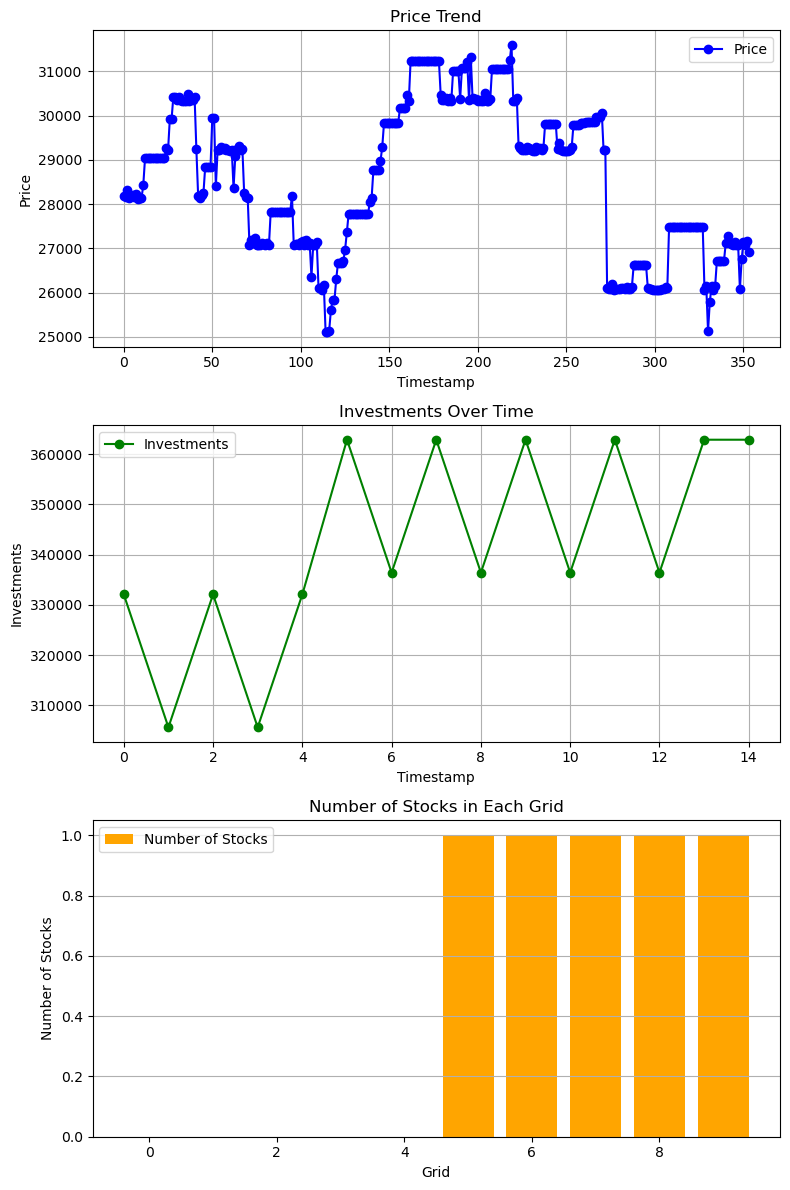

In [ ]:
# 网格交易 部分
from grid_calculator import GridCalculator
import random

def generate_prices(length, min_value, max_value):
    """
    生成一个随机数列表，每个数字有一位小数，相邻两个数不同。

    :param length: 随机数列表的长度
    :param min_value: 随机数的最小值（含）
    :param max_value: 随机数的最大值（含）
    :return: 满足条件的随机数列表
    """
    if min_value >= max_value:
        raise ValueError("min_value must be less than max_value")

    prices = []
    prev_price = None

    while len(prices) < length:
        # 生成一个具有一位小数的随机数
        price = round(random.uniform(min_value, max_value), 1)
        
        # 确保当前价格与前一个价格不同
        if price != prev_price:
            prices.append(price)
            prev_price = price

    return prices

# seed = 66
# random.seed(seed)
# prices = generate_prices(length=100, min_value=8, max_value=12)
# prices = [10] + prices + [11]

prices = grid_trading
print("prices:", prices)
config = {
    "lower_bound": 25000,
    "upper_bound": 38000,
    "num_grids": 10,
    "leverage": 1,
    "investment": 500000,
    "mode": "arithmetic"
}
grid_calc = GridCalculator(config, prices)
grid_calc.generate_grid()

print("开始交易")
grid_calc.run()

grid_calc.conclusion()

In [ ]:
# Validate configuration
config.validate()

# Initialize components
market_data = MarketData(config)
grid_calc = GridCalculator(config)
risk_metrics = RiskMetrics(config)
visualizer = GridVisualizer(config)

# Generate or fetch market data
prices, timestamps = market_data.generate_simulated_data()

# Process price updates
trades = []
equity_curve = [config.initial_capital]

for i, (price, timestamp) in enumerate(zip(prices, timestamps)):
    realized_pnl, unrealized_pnl = grid_calc.process_price_update(price, timestamp)
    current_equity = config.initial_capital + realized_pnl + unrealized_pnl
    equity_curve.append(current_equity)
    risk_metrics.update_equity_curve(current_equity)
    
    if grid_calc.trades:
        trades.append((timestamp, price, grid_calc.trades[-1].side))

# Calculate risk metrics
max_drawdown = risk_metrics.calculate_max_drawdown()
sharpe_ratio = risk_metrics.calculate_sharpe_ratio()

# Print results
print(f"\nTrading Results:")
print(f"Initial Capital: ${config.initial_capital:,.2f}")
print(f"Final Equity: ${equity_curve[-1]:,.2f}")
print(f"Total Return: {((equity_curve[-1]/config.initial_capital - 1) * 100):,.2f}%")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Visualize results
visualizer.plot_trading_view(prices, timestamps, trades)
visualizer.plot_equity_curve(equity_curve, timestamps)

